# Notebook du projet

## Situation initiale

In [37]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [136]:
n = 10 # nombre d'individus

In [137]:
# Liste aléatoire de 0 et de 1 de taille n, 0 pour Samsung et 1 pour Apple
X_0 = np.asarray([random.randint(0,1) for i in range(n)])

In [138]:
# Nombre de Samsung à l'état initial
S_0 = sum(X_0[i] == 0 for i in range(n))

## Chaîne de Markov S(t)

In [44]:
def nbr_samsung(X_0):
    
    """Fonction qui compte le nombre d'indivu possédant un Samsung dans une liste d'individu
       La liste doit être un numpy array"""
    
    # Nombre de Samsung dans l'ensemble des individus
    S = (np.sum(X_0 == 0))
    return int(S) 

In [45]:
nbr_samsung(X_0)

5

## Modèle 1 : Avis de la majorité des voisins

### Implémentation du processus

In [46]:
def model_1(X_0):
    
    """Implémentation de l'évolution du modèle 1
       Renvoie la liste après une étape du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    i = np.random.choice(len(X)) # on tire un individu X_i au hasard dans la liste X
    V = np.delete(X,i)           # ensemble des voisins de l'individu X_i
    
    # Condition d'évolution de la méthode 1
    if  np.sum(V == 1) > np.sum(V == 0):            
        X[i] = 1
    else:
        X[i] = 0

    return X

In [47]:
model_1(X_0)

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 0])

In [48]:
def model_1_iter(X_0, t):
    
    """Fonction itérative du modèle 1
       Renvoie la liste après t étapes du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    k = 0
    while (k<t):
        X = np.copy(model_1(X))
        k = k+1
    return X

In [49]:
model_1_iter(X_0, 7)

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0])

In [50]:
def model_1_recu(X_0, t):
    
    """Fonction récursive du modèle 1
       Applique t fois le processus du modèle 1 à la même liste
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    
    if (t == 0):
        return X
    else:
        return model_1(model_1_recu(X,t-1))

In [51]:
model_1_recu(X_0, 9)

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

## Modèle 2 : Avis d'un seul voisin

### Implémentation du processus

In [52]:
def model_2(X_0):
    
    """Implémentation de l'évolution du modèle 2
       Renvoie la liste après une étape du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)    
    i = np.random.choice(len(X)) # on tire un individu X_i au hasard dans la liste X
    V = np.delete(X,i)           # V_i ensemble des voisins de l'individu X_i
    j = np.random.choice(len(V)) # on tire un individu X_j au hasard dans l'ensemble V_i
    
    X[i] = np.copy(V[j])
    
    return X

In [53]:
model_2(X_0)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0])

In [54]:
def model_2_iter(X_0, t):
    
    """Fonction itérative du modèle 2
       Renvoie la liste après t étapes du processus
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    k = 0
    
    while (k<t):
        k = k+1
        X =np.copy(model_2(np.copy(X)))
    return X

In [55]:
model_2_iter(X_0, 7)

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 1])

In [56]:
def model_2_recu(X_0, t):
    
    """Fonction récursive du modèle 1
       Applique t fois le processus du modèle 1 à la même liste
       Fonctionne avec des numpy array"""
    
    X = np.copy(X_0)
    
    if (t == 0):
        return X
    else:
        return model_2(model_2_recu(X, t-1))    

In [57]:
model_2_recu(X_0, 9)

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 1])

## Temps d'atteintes des états absorbants

### Modèle 1

In [58]:
def temps_att_1(X_0):
    
    """Fonction qui calcul le nombre d'étape nécessaire pour atteindre l'un des deux états absorbants dans le modèle 1"""
    
    cpt = 0 # variable qui compte le nombre d'étapes
    
    while (model_1_recu(X_0,cpt).any() != np.zeros(len(X_0)).any() or model_1_recu(X_0,cpt).any() != np.ones(len(X_0)).any()):
        cpt = cpt + 1
    return cpt

### Modèle 2

In [59]:
def temps_att_2(X_0):
    
    """Fonction qui calcul le nombre d'étape nécessaire pour atteindre l'un des deux états absorbants dans le modèle 2"""
    
    cpt = 0 # variable qui compte le nombre d'étapes
    
    while (model_2_recu(X_0,cpt).any() != np.zeros(len(X_0)).any() or model_2_recu(X_0,cpt).any() != np.ones(len(X_0)).any()):
        cpt = cpt + 1
    return cpt

## Trajectoires de la chaîne de Markov S

In [145]:
%matplotlib notebook

### Modèle 1

In [146]:
def traj_model_1(X_0, t):

    """Fonction qui donne les t premiers éléments de la chaine de Markov S dans le modèle 1 avec pour état initial X_0"""

    S = np.zeros(t+1)
    S[0] = nbr_samsung(X_0)
    
    for i in range(1,t+1):
        X_0 = model_1_recu(X_0,1)
        S[i] = nbr_samsung(X_0)
    
    return S

In [147]:
traj_model_1(X_0,10)

array([6., 7., 7., 7., 7., 7., 7., 7., 8., 8., 8.])

### Modèle 2

In [154]:
def traj_model_2(X_0, t):

    """Fonction qui donne les t premiers éléments de la chaine de Markov S dans le modèle 2 avec pour état initial X_0"""

    S = np.zeros(t+1)
    S[0] = nbr_samsung(X_0)
    
    for i in range(1,t+1):
        X_0 = model_2_recu(X_0,1)
        S[i] = nbr_samsung(X_0)
    
    return S

In [155]:
traj_model_2(X_0,10)

array([6., 5., 5., 4., 4., 4., 4., 4., 3., 2., 2.])

### Tracé des trajectoires

<IPython.core.display.Javascript object>


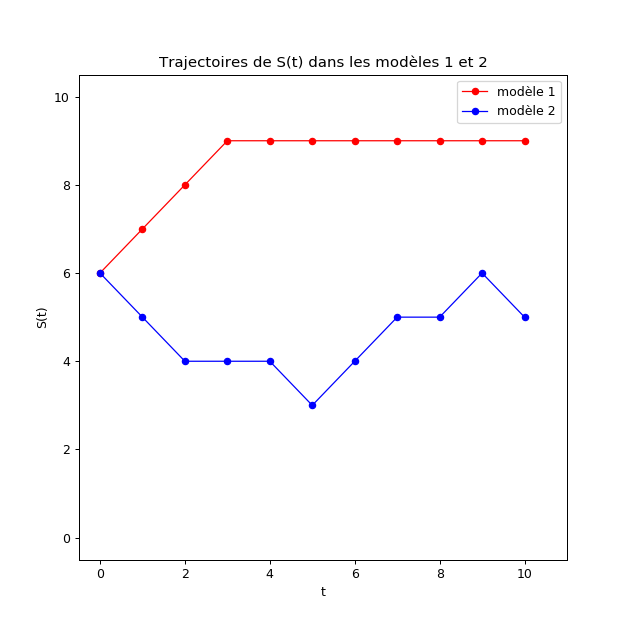

In [185]:
t = 10
k = nbr_samsung(X_0)

u = np.linspace(0,t,t+1)

fig = plt.figure(1,figsize=(7,7))

# On trace 3 trajectoires
plt.plot(u,traj_model_1(X_0,t),"-ro",label="modèle 1",ms=5,linewidth=1)

plt.plot(u,traj_model_2(X_0,t),"-bo",label="modèle 2",ms=5,linewidth=1) 

plt.title('Trajectoires de S(t) dans les modèles 1 et 2')
plt.xlabel('t')
plt.ylabel('S(t)')
plt.xlim(-0.5,t+1)
plt.ylim(-0.5,10.5)
plt.legend()
plt.show()